In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets 

Implement thuật toán PCA bằng numpy

In [43]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components 
        
    def fit_transform(self, X):
        #Compute the sample mean and translate the dataset so that it's centered around 0 
        mean = np.mean(X, axis = 0)
        X = X - mean 
        
        #Compute Covariance matrix of centered matrix 
        cov = X.T.dot(X) / X.shape[0]
        
        #Compute the eigenvalues and eigenvectors of the covariance matrix
        eigen_values, eigen_vectors = np.linalg.eig(cov)
        
        #Sort eval and evec in descending order
        e_index_order = np.flip(eigen_values.argsort())
        eigen_values = eigen_values[e_index_order]
        eigen_vectors = eigen_vectors[e_index_order]
        
        # Save the first n_components eigenvectors as principal components
        principal_components = np.take(eigen_vectors, np.arange(self.n_components), axis=0)

        return np.matmul(X, principal_components.T)
         

Dùng thuật toán ở bài 2, giảm dữ liệu iris về 2 chiều:  https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

a. Visualize dữ liệu giảm chiều với scatter plot và label của hoa

b. Vẽ explained variance graph với các chiều của dữ liệu

In [44]:
iris = pd.read_csv(r"C:\Users\84941\OneDrive - National Economics University\Documents\Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


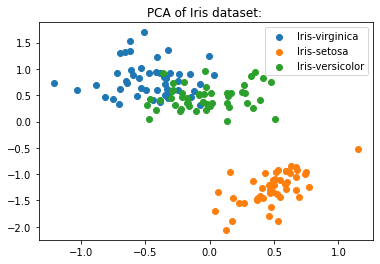

In [45]:
if __name__ == "__main__":
    iris = iris
    X = iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].to_numpy()
    Y = iris["Species"].to_numpy()
    pca = PCA(n_components = 2)
    new_X = pca.fit_transform(X)
    for label in set(Y):
        X_class = new_X[Y == label]
        plt.scatter(X_class[:, 0], X_class[:, 1], label = label)
    plt.title('PCA of Iris dataset: ')
    plt.legend()